<a href="https://colab.research.google.com/github/NishankDave/TSF-Internship----Data-Science/blob/main/sparktask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1 : Prediction using Supervised ML
Predict the percentage of an student based on the number of study hours.
1. This is a simple linear regression task as it involves just 2 variables.
2. You can use R, Python, SAS Enterprise Miner or any other tool
3. Data can be found at http://bit.ly/w-data
4. What will be predicted score if a student studies for 9.25 hrs/ day?

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
# Reading data from data link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Basic Functionality of pandas

In [3]:
# Just some desciption of the data we are working with
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Returns the first n rows.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Returns the last n rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# Size of the given data
data.size

50

Filtering the Dataset

In [7]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Graphical Representation of the Distribution of scores

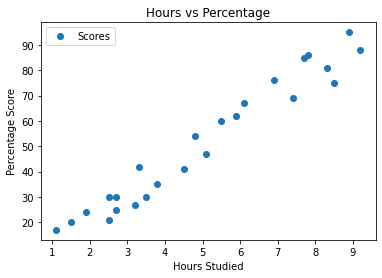

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

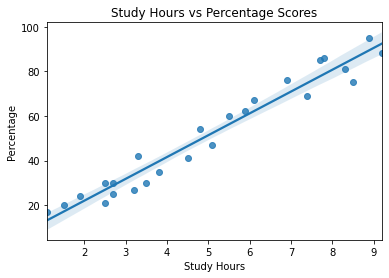

In [9]:
# plotting regressor plot to determine the relationship between the two parameters
sns.regplot(x = data['Hours'], y = data['Scores'], data = data)
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

Preparing the data

In [10]:
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
# Using Scikit-Learn's built-in train_test_split() method:

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.25, test_size = 0.20, random_state = 0)

Training the Model

In [103]:
# Using LinearRegression from Scikit-Learn's built-in method:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict = linearRegressor.predict(x_train)

Training the Algorithm

In [13]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


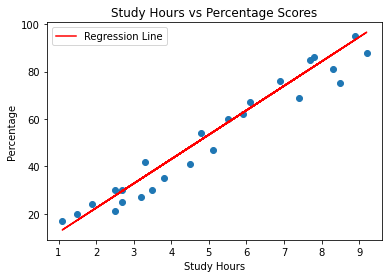

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.scatter(X, y)
plt.plot(X, line, color ='red', label = 'Regression Line')
plt.legend()
plt.show()

Checking Training And Testing Accuracy

In [15]:
print("Test Score : {:.5%}".format(regressor.score(x_test, y_test)))
print("Training Score : {:.5%}".format(regressor.score(x_train, y_train)))

Test Score : 92.10504%
Training Score : 96.55282%


Making Predictions

Now, we will predict values using our trained model and algorithm

In [16]:
print(x_test) # Testing data - In Hours
y_predict = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}) # Predicting percentage
data

,Actual,Predicted
0,20,17.284317
1,27,34.795679
2,69,78.059043
3,30,27.585118
4,62,62.607841


In [18]:
# Predicting the score for 9.25 hours
print('Score of student who studied for 9.25 hours a day :', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day : [97.11552431]


Checking Efficiency of the Model

In [19]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R-2 :', metrics.r2_score(y_test, y_predict))

Mean Absolute Error : 4.518625442354259
Mean Squared Error : 31.28298403488419
Root Mean Squared Error : 5.593119347455782
R-2 : 0.9210504138025333


R-squared gives the goodness of the fit and as can be seen it is 94.549% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 94.549%

# **THANK YOU FOR VIEWING**